# Fundamentos

## Pendamiento geográfico

**Los datos geográficos son ubicuos**
   - Todo objeto o fenómeno tiene una ubicación en el espacio-tiempo.
   - La geografía no solo se trata de dónde están las cosas, sino de **cómo se relacionan entre sí**.

**Relaciones espaciales como valor añadido**
   - La información espacial permite contextualizar observaciones.
   - Facilita la conexión de datos entre sí y con fuentes externas.

**Primera ley de la geografía (Tobler)**
   - “Todo está relacionado con todo lo demás, pero las cosas cercanas están más relacionadas que las cosas distantes.”
   - Esto aplica tanto en **espacio** como en **tiempo**.

**Importancia de la ubicación y la relación**
   - Pensar geográficamente implica entender:
     - **Dónde** están las cosas.
     - **Cómo** están relacionadas entre sí.

**Modelos y mapas como simplificaciones útiles**
   - George Box: “Todos los modelos están mal, pero algunos son útiles.”
   - Keith Ord (parafraseado): “Todos los mapas están mal, pero algunos son útiles.”
   - Los modelos y mapas ayudan a **resumir y comunicar** realidades complejas.

**Distinción clave en el libro**
   - **Modelo de datos**: Representación conceptual de un fenómeno geográfico.
   - **Estructura de datos**: Representación computacional de los datos geográficos (tema de la sección 1.3).


## Modelos conceptuales

**Desafío de representar conceptos geográficos**
   - Las representaciones conceptuales de fenómenos geográficos son complejas.
   - Por ejemplo, la densidad poblacional suele representarse como un promedio por unidad de área, aunque en realidad las personas son entidades discretas que se mueven en el espacio-tiempo.

**Tres modelos conceptuales clásicos**
   - **Objetos (Objects)**: Entidades discretas que ocupan una posición específica en el espacio y el tiempo (ej. una persona, una parcela).
   - **Campos (Fields)**: Superficies continuas que pueden ser medidas en cualquier ubicación del espacio-tiempo (ej. temperatura, altitud, densidad como superficie).
   - **Redes (Networks)**: Conjuntos de conexiones entre objetos o posiciones dentro de un campo (ej. rutas de buses, calles, redes de distribución).

**Importancia del modelo elegido**
   - El modelo conceptual determina cómo se definen las relaciones espaciales:
     - En objetos: la proximidad espacial define relaciones.
     - En redes: importa la conectividad más que la distancia.
     - En campos: se debe considerar la interpolación entre observaciones.

**Relación entre modelo y realidad**
   - Lo que medimos puede no reflejar exactamente cómo funciona el proceso.
   - Los modelos ayudan a responder preguntas específicas, aunque simplifican la realidad.


**Asociación entre mapas y modelos conceptuales**

A continuación se muestra cómo se relacionan los modelos conceptuales de **objetos**, **campos** y **redes** con los datos de cantones de Ecuador.

| Modelo Conceptual | Descripción | Ejemplo con `2012_nxcantones` | Visualización |
|-------------------|-------------|-------------------------------|----------------|
| **Objetos**       | Entidades discretas que ocupan una posición específica en el espacio y el tiempo. | Cada cantón representado como una unidad poligonal con atributos (nombre, población, etc.). | ![Objetos](images/pl1.jpg) |
| **Campos**        | Superficies continuas que pueden ser medidas en cualquier punto del espacio. | Densidad poblacional interpolada sobre el territorio nacional (por ejemplo, habitantes/km² por cantón como superficie continua). | ![Campos](images/pl2.jpg) |
| **Redes**         | Conjuntos de conexiones entre objetos o posiciones. | Red de carreteras entre cantones, rutas de transporte, flujos migratorios o comerciales. | ![Redes](images/pl3.jpg) |

---

¿Cómo aplicar cada modelo?

- **Objetos**: análisis por unidad administrativa (agregaciones, estadísticas).
- **Campos**: interpolación, análisis de fenómenos continuos (temperatura, densidad).
- **Redes**: estudio de movilidad, rutas, conectividad y accesibilidad.

> 📁 Fuente de datos: [`2012_nxcantones.zip`](https://github.com/vmoprojs/DataLectures/blob/master/SpatialData/2012_nxcantones.zip)


## Representaciones computacionales: estructuras de datos


**De modelos conceptuales a estructuras computacionales**

- Los **modelos de datos** (objetos, campos, redes) son representaciones conceptuales.
- Para analizarlos computacionalmente, deben traducirse a **estructuras de datos**.
- Estas estructuras forman el puente entre el pensamiento geográfico y la implementación técnica.



**Estructuras principales: tablas, superficies y grafos**

| Modelo de datos | Estructura de datos | Descripción |
|------------------|----------------------|-------------|
| **Objetos**      | **Geographic tables** (`GeoDataFrame`, `sf`, `PostGIS`) | Filas = entidades geográficas, columnas = atributos. La geometría es una columna más. |
| **Campos**       | **Superficies o cubos** (`xarray`, grillas regulares) | Representan fenómenos continuos como temperatura o densidad. Almacenados como matrices. |
| **Redes**        | **Grafos espaciales** (`networkx`, `pysal`) | Representan relaciones topológicas entre entidades geográficas. |


![GeoDataFrame](images/f1_1.jpg) 
*Figura: una tabla geográfica como GeoDataFrame*

![GeoDataFrame](images/f1_2.jpg) 
*Figura: Estructuras de datos de superficie para modelos de datos de campo*

![GeoDataFrame](images/f1_3.png) 
*Figura: resumen estructuras de datos*

**Influencia de la tecnología**
- La tecnología que usamos moldea cómo pensamos los modelos espaciales.
- Herramientas como QGIS y ArcGIS han estandarizado estructuras tipo **tabla** y **ráster**.
- Cuidado con la “tecnología limitante”: adoptar estructuras por conveniencia puede limitar el análisis.



**La tabla geográfica (GeoTable)**
- Estructura híbrida que integra datos espaciales y atributos en un solo marco.
- Ejemplos:
  - `GeoDataFrame` en Python (`geopandas`)
  - `sf` en R
  - `PostGIS` en bases de datos





**Tendencias emergentes**
- Nuevas estructuras como:
  - **Grillas hexagonales** (`H3` de Uber)
  - **Cubos espaciales** (`S2` de Google)
- Permiten representar datos espaciales de forma más eficiente y escalable.

> Estas estructuras computacionales hacen posible aplicar la lógica geográfica en contextos de análisis de datos masivos y en tiempo real.




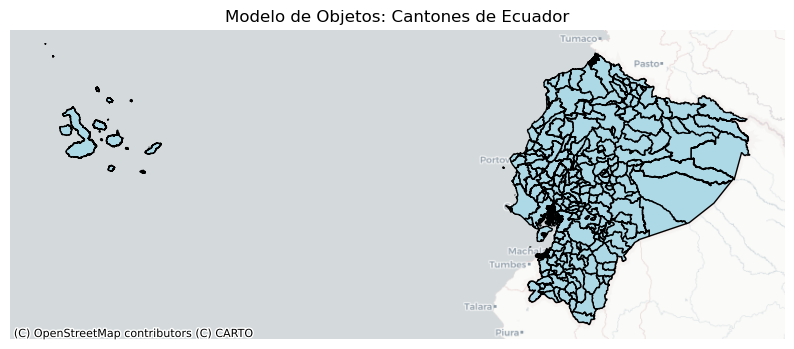

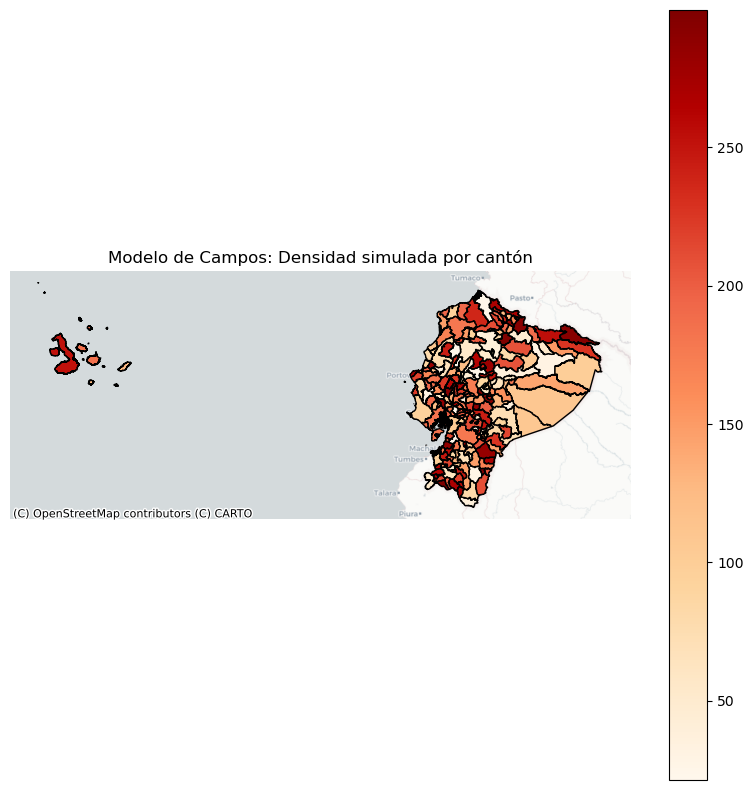

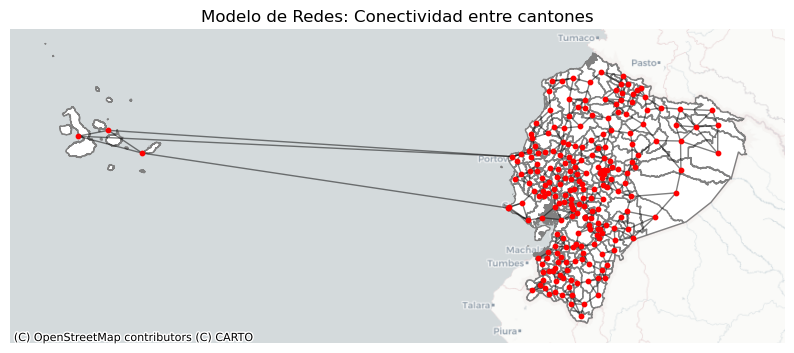

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import networkx as nx
from shapely.geometry import Point
import numpy as np
from io import BytesIO
import zipfile
import requests
from sklearn.neighbors import NearestNeighbors

# 1. Descargar shapefile directamente desde GitHub
url = "https://github.com/vmoprojs/DataLectures/raw/master/SpatialData/2012_nxcantones.zip"
response = requests.get(url)
zip_bytes = BytesIO(response.content)

# 2. Extraer y leer el shapefile
with zipfile.ZipFile(zip_bytes, "r") as z:
    shp_name = [f for f in z.namelist() if f.endswith(".shp")][0]
    z.extractall("tmp_shapefile")
    gdf = gpd.read_file("tmp_shapefile/" + shp_name)

# 3. Reproyección a Web Mercator para usar contextily
gdf = gdf.to_crs(epsg=3857)

# ---------- 1. MODELO DE OBJETOS ----------
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title("Modelo de Objetos: Cantones de Ecuador")
plt.axis('off')
plt.show()

# ---------- 2. MODELO DE CAMPOS ----------
np.random.seed(0)
gdf["densidad_sim"] = np.random.uniform(20, 300, size=len(gdf))

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="densidad_sim", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title("Modelo de Campos: Densidad simulada por cantón")
plt.axis('off')
plt.show()

# ---------- 3. MODELO DE REDES ----------
centroids = gdf.geometry.centroid
points = [Point(xy) for xy in zip(centroids.x, centroids.y)]
G = nx.Graph()

coords = np.array([[p.x, p.y] for p in points])
knn = NearestNeighbors(n_neighbors=4).fit(coords)
distances, indices = knn.kneighbors(coords)

for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # excluir a sí mismo
        G.add_edge(i, j)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, facecolor="white", edgecolor="gray")
pos = {i: (p.x, p.y) for i, p in enumerate(points)}
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=10, node_color="red")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title("Modelo de Redes: Conectividad entre cantones")
plt.axis('off')
plt.show()
